## Interactively analysing temporal components of rain gage data

Import the class object RainGage and initialize it with a year of data. The output from this are all contained in attributed of the ** `RainGage`** class. All of the data are contained in a **`pandas.DataFrame`** object called **`RainGage.df`**

In [1]:
%matplotlib inline
from raingage import *

In [2]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"

In [ ]:
rg = RainGage(path=path, year=range(1996,2016,1))
rg.df.to_csv(rg.path+"Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat", sep=' ', na_rep='-99')

In [3]:
rg = RainGage(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")

In [ ]:
rg.get_wet()

Say we want to determine which days are wet and which aren't based on threshold. The default threshold is the minimum non-zero value recorded over a timestep (in this case .001mm/15min). 

In [ ]:
rg.thresh

The threshold can be set by using **`RainGage.thresh = `** and reset back to the default using **`RainGage.reset_thresh()`** 

In [ ]:
rg.thresh = 0.254

In [ ]:
rg.reset_thresh()

Now we are ready to figure out which of the days are wet and which aren't

In [ ]:
rg.get_wet()

## Plotting probability of wet days occuring

We can make plots of the probability that different months will be wet:

In [ ]:
rg.get_prob_wet()

We can make plots of the probability that different hours will be wet:

In [ ]:
rg.get_prob_wet(interval='diurnal')

If we are interested in the difference between the hours with a closer look at the months: 

In [ ]:
rg.get_prob_wet(show_all=True)

If we want to look at a specific month (say February and September):

In [ ]:
rg.get_prob_wet(show_all=True, month=[2,9], hour=range(11,24), time_step='1H')

In [ ]:
rg.get_prob_wet(gage=['RG1','RG2','RG3'], interval='seasonal')

Build your own if you get frustrated with the limited functionality, you have access the dataframe for the group run most recently when you call `RainGage.show_all`

In [ ]:
rg.show_all[[4,8,12]].loc[[0,3]].plot(kind='bar', figsize=(16,6))

## Plotting distribution of rain rates for wet days

When we are satisfied with the wet dry aspect of things we can make different assortments of boxplots to highlight the distribution of rainfall across months:

In [ ]:
rg.get_boxplots(interval='seasonal')
rg.get_distribution(interval='seasonal')

Across hours:

In [ ]:
rg.get_boxplots(interval='diurnal')
rg.get_distribution(interval='diurnal')

That was an average of all the months at each hour, but say we are just interested in September again:

In [ ]:
rg.get_boxplots(month=9, look_closer=[0,4,8,12,16,20])

We can also change the time_step at which we evaluate rainfall from 15 minute, to 1 hour, or 1 day, or whatever we want!

In [ ]:
rg.get_boxplots(interval='seasonal', time_step='1D')

## Build your own functionality

You can also just use all the functionality available natively in `pandas.DataFrame` objects. 

In [ ]:
#rg.df.cumsum(axis=0).plot(figsize=(16,6), legend=None)

### Using R from within Python

In [4]:
import rpy2.robjects as robjects
from rpy2.robjects import r, pandas2ri

In [148]:
get_storm(rg, '2013-08-13')

In [240]:
s = {}
d = {}
for i, col in enumerate(rg.storm):
    if col not in rg.RG_lon_lat.columns:
        foo = r('SVG_data = read.table("./SVG_data", sep=",",header = TRUE) \n' +
                'source("SVG.r") \n'+
                'iSVG_tab <- get_iSVG(SVG_data, {index}, target_np=5, alpha=46.5, tol.hor=20, last_max=TRUE, max_bnd=FALSE)\n'.format(index=i+1)
                )
        df = pd.DataFrame(robjects.numpy2ri.ri2numpy(robjects.globalenv['iSVG_tab']))
        try:
            df.index = df.dist
        except:
            continue
        d.update({col: df})
        s.update({col: (df['gamma'].idxmax(axis=0), df['np'].sum())})
df = pd.DataFrame(s).transpose()
df.columns=['dist', 'np']

In [241]:
d.values()[2]

,np,dist,gamma,dir.hor,dir.ver,id
dist,,,,,,
6.432199,29,6.432199,56.793103,46.5,0,1
12.357241,30,12.357241,85.483333,46.5,0,1
18.107494,29,18.107494,85.483333,46.5,0,1
24.670647,32,24.670647,85.483333,46.5,0,1
34.198009,30,34.198009,85.483333,46.5,0,1
44.988698,3,44.988698,85.483333,46.5,0,1


In [242]:
df47_20 = df

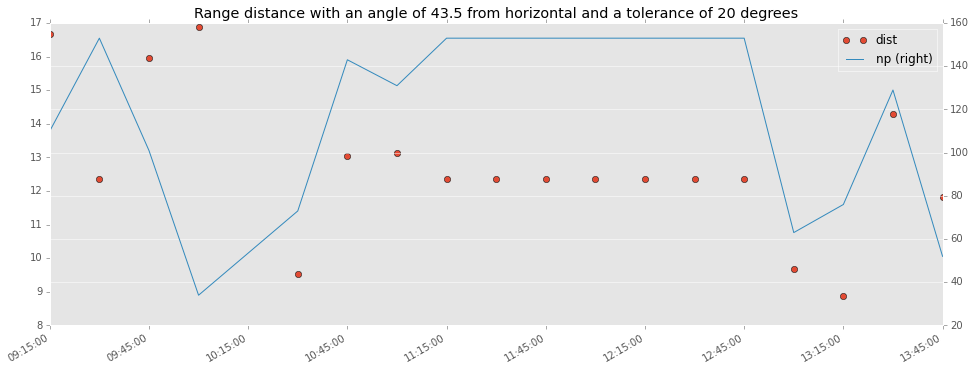

In [243]:
df47_20.plot(figsize=(16,6), style=['o','-'],secondary_y='np')
plt.title('Range distance with an angle of 43.5 from horizontal and a tolerance of 20 degrees')
plt.show()

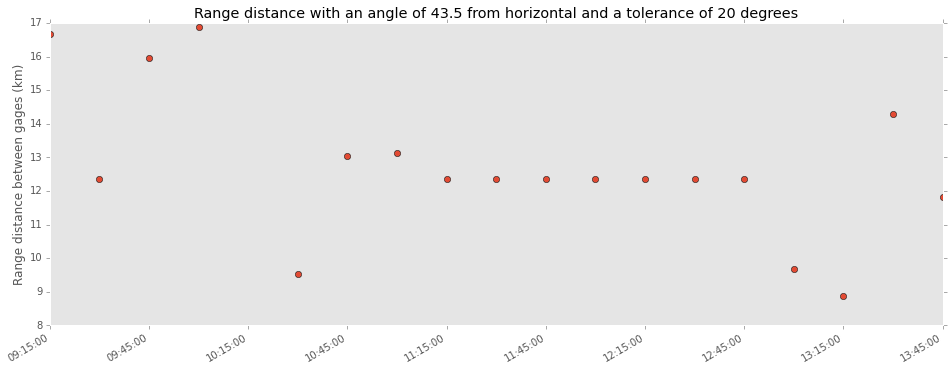

In [244]:
df47_20['dist'].plot(figsize=(16,6), style=['o'],secondary_y='np')
plt.ylabel('Range distance between gages (km)')
plt.title('Range distance with an angle of 43.5 from horizontal and a tolerance of 20 degrees')
plt.savefig('./output/2013-08-13 range with angle 43.jpg')
plt.show()

In [ ]:
# run r commands to get the SVG
foo = r('SVG_data = read.table("./SVG_data", sep=",",header = TRUE) \n' +
        'source("SVG.r") \n'+
        'SVG_tab <- get_SVG(SVG_data, last_max=TRUE, cressie=FALSE)\n'
        )
df = pd.DataFrame(robjects.numpy2ri.ri2numpy(robjects.globalenv['SVG_tab']))
df.index = df.dist
names=['np', 'dist']
for t in rg.storm.columns[5::]:
    names.append(t)
df.columns = names

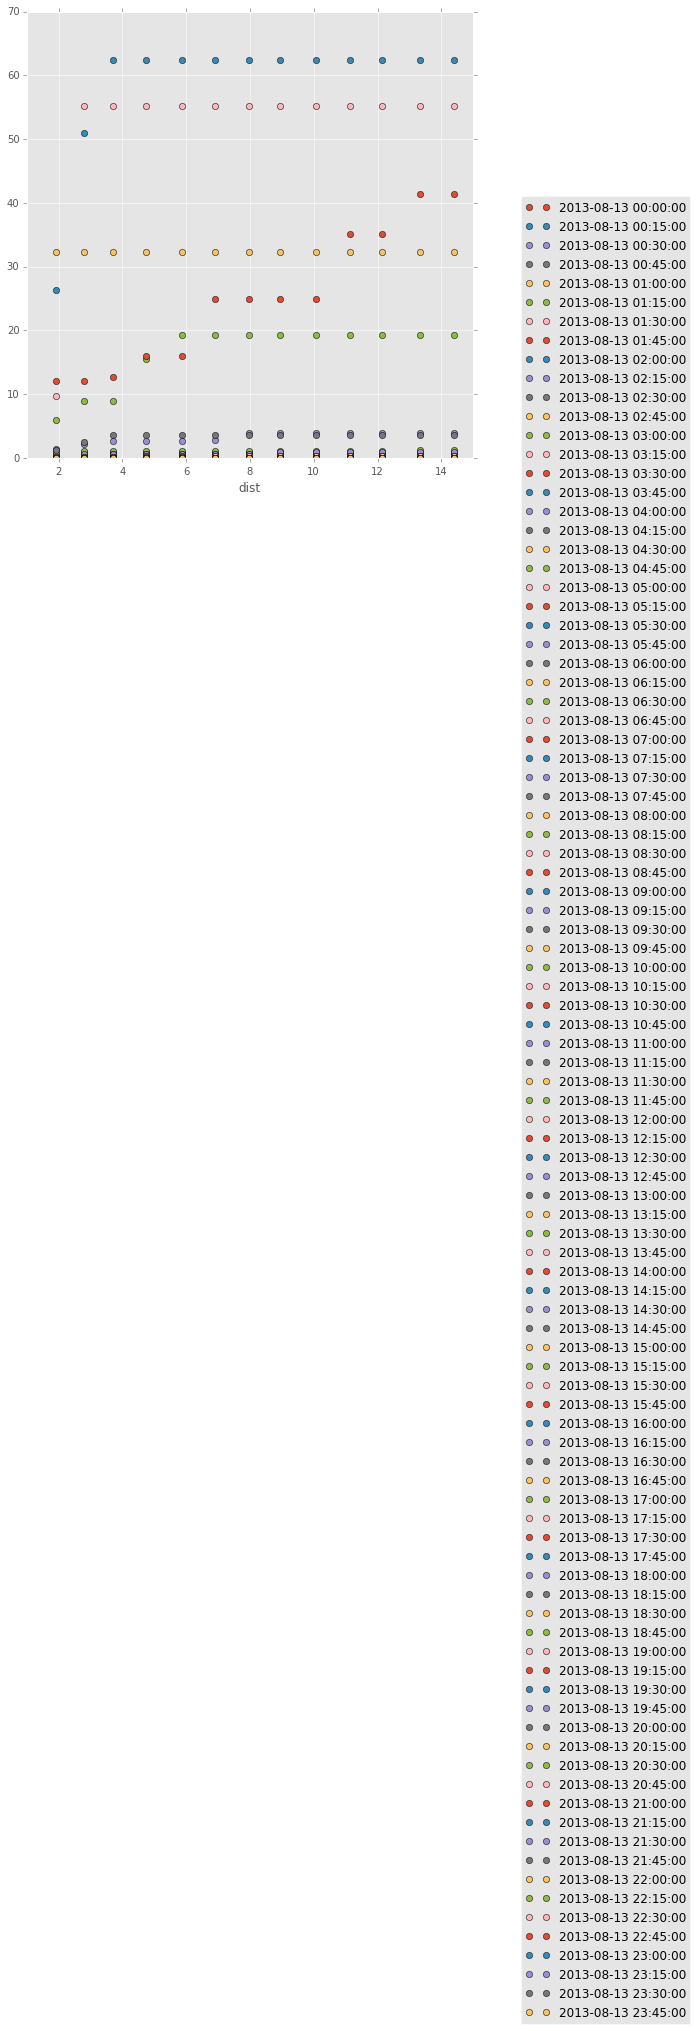

In [67]:
df[range(2,len(df.columns))].plot(style='o', figsize=(8, 8), xlim=(1,15), legend=False)
plt.legend(bbox_to_anchor=(1.5, 0.6))

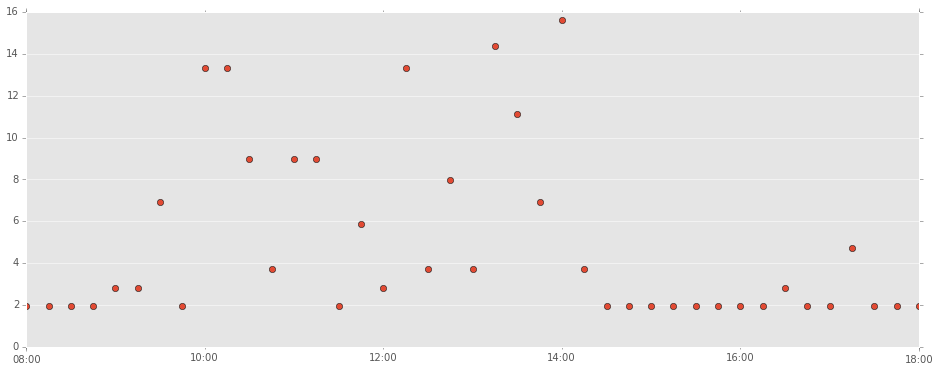

In [85]:
s['2013-08-13 8:00':'2013-08-13 18:00'].plot(style='o',figsize=(16,6))
plt.savefig('./output/2013-08-13 range.jpg')
plt.show()